In [ ]:
!pip install mysql-connector-python


#Loading dataset from MySQL Database

In [ ]:
import mysql.connector
import pandas as pd

# Connect to the MySQL database
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='tiktok_data'
)

# Fetch data from the MySQL table
query = "SELECT * FROM tiktok_videos"
df = pd.read_sql(query, connection)

# Close the connection
connection.close()


In [ ]:
# Display the first few rows
print(df.head())


         user_name              user_id             video_id  \
0    ashleytisdale  6780470206164042757  6998948804456205574   
1  imgregorydillon  6986299418048922629  6997965560952687877   
2         bswift13  6922286759305790470  6998596659642912006   
3          alejwho  6915511271853442053  6997476963472477445   
4        usimmango  6760445055964906501  6997449150220569862   

                                          video_desc  video_time  \
0   We pretty much invented Tiktok. You’re welcome 😂  1629569756   
1  This couldn’t have been harder 🤣🕯🍩 #birthdayfa...  1629340827   
2  @franksredhot UNBOXING! #hotsaucejourney #team...  1629487766   
3                                                NaN  1629227066   
4        Thank y’all💕@billboard // Insta: Usim.mango  1629220590   

   video_length                                         video_link  n_likes  \
0            14  https://www.tiktok.com/@ashleytisdale/video/69...   289300   
1            70  https://www.tiktok.com/@imgrego

#Data collection and preprocessing

##a. Check for Missing Values

Missing values can disrupt analysis. We'll identify columns with missing data.


In [ ]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
user_name       0
user_id         0
video_id        0
video_desc      6
video_time      0
video_length    0
video_link      0
n_likes         0
n_shares        0
n_comments      0
n_plays         0
dtype: int64


##b. Handle Missing Values


*   For video_desc, missing values can be replaced with "No Description", as it's a textual feature.
*   Other columns don’t seem to have missing values.




In [ ]:
# Fill missing video descriptions with a placeholder
df['video_desc'] = df['video_desc'].fillna("No Description")


##c. Convert video_time (Unix timestamp) to Readable Date


Unix timestamps are not human-readable. We'll convert them to a datetime format for better understanding and potential time-based analysis.

In [ ]:
# Convert video_time to datetime
from datetime import datetime

df['video_time'] = pd.to_datetime(df['video_time'], unit='s')


##d. Remove Duplicates

Duplicate rows can bias analysis. We'll check and drop duplicates if any.


In [ ]:
# Check and remove duplicate rows
print("Duplicate Rows Before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate Rows After:", df.duplicated().sum())


Duplicate Rows Before: 0
Duplicate Rows After: 0


##e. Check for Outliers

Outliers in numerical features like n_likes, n_shares, n_comments, or n_plays may skew the analysis. We'll visualize and potentially handle these using quantile-based thresholds.

In [ ]:
# Calculate the 99th percentile for each numerical column
upper_limit = df[['n_likes', 'n_shares', 'n_comments', 'n_plays']].quantile(0.99)

# Filter rows where each column value is below the corresponding 99th percentile
for col in ['n_likes', 'n_shares', 'n_comments', 'n_plays']:
    df = df[df[col] <= upper_limit[col]]


#Verify Cleaned Dataset

Inspect the cleaned and transformed dataset.


In [ ]:
# Display the first few rows of the preprocessed dataset
print(df.head())


# Display dataset info
print(df.info())


         user_name              user_id             video_id  \
0    ashleytisdale  6780470206164042757  6998948804456205574   
1  imgregorydillon  6986299418048922629  6997965560952687877   
2         bswift13  6922286759305790470  6998596659642912006   
3          alejwho  6915511271853442053  6997476963472477445   
4        usimmango  6760445055964906501  6997449150220569862   

                                          video_desc          video_time  \
0   We pretty much invented Tiktok. You’re welcome 😂 2021-08-21 18:15:56   
1  This couldn’t have been harder 🤣🕯🍩 #birthdayfa... 2021-08-19 02:40:27   
2  @franksredhot UNBOXING! #hotsaucejourney #team... 2021-08-20 19:29:26   
3                                     No Description 2021-08-17 19:04:26   
4        Thank y’all💕@billboard // Insta: Usim.mango 2021-08-17 17:16:30   

   video_length                                         video_link  n_likes  \
0            14  https://www.tiktok.com/@ashleytisdale/video/69...   289300   


#Exploring data

#Numerical Features


In [ ]:
# Display statistical summaries for numerical columns
print(df[['n_likes', 'n_shares', 'n_comments', 'n_plays', 'video_length']].describe())


            n_likes       n_shares     n_comments       n_plays  video_length
count  9.800000e+01      98.000000      98.000000  9.800000e+01     98.000000
mean   2.115034e+06   46719.897959   28968.418367  1.116451e+07     26.306122
std    3.240194e+06   81988.085502   40521.472272  1.741819e+07     21.972996
min    3.260000e+02       3.000000      31.000000  8.689000e+03      6.000000
25%    1.987500e+05    1806.750000    2262.500000  1.125000e+06     13.250000
50%    9.706000e+05   12800.000000   10700.000000  5.500000e+06     15.500000
75%    2.450000e+06   45550.000000   40300.000000  1.275000e+07     34.500000
max    1.640000e+07  409900.000000  167500.000000  1.071000e+08    129.000000


#Categorical Features


For categorical or textual columns, review unique values and frequencies:



In [ ]:
# Unique values in user_name
print("Unique users:", df['user_name'].nunique())

# Example: Top 5 most frequent descriptions
print("Top 5 video descriptions:")
print(df['video_desc'].value_counts().head())


Unique users: 92
Top 5 video descriptions:
video_desc
No Description                                          6
We pretty much invented Tiktok. You’re welcome 😂        1
#greenscreenvideo                                       1
incredible 🏆#fyp#greenscreenvideo#Destinationdepop      1
@josh1morris #dog #fyp #bruh #bruhh #wtf #joshmorris    1
Name: count, dtype: int64


##Visualizations

Use matplotlib and seaborn to generate meaningful plots.



###a. Distribution of Engagement Metrics


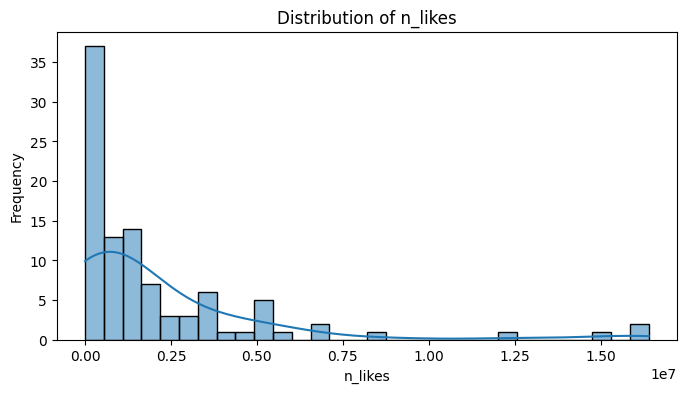

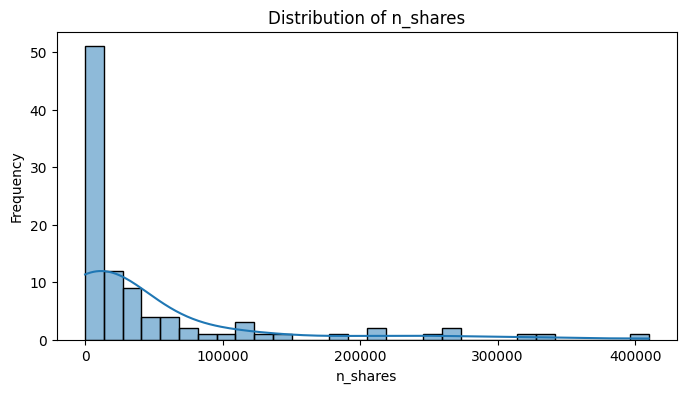

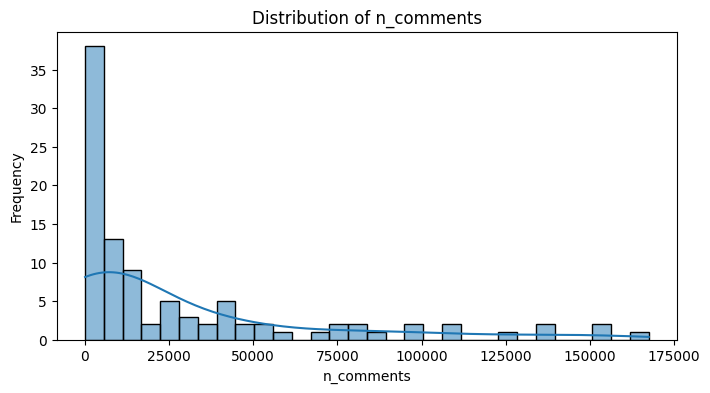

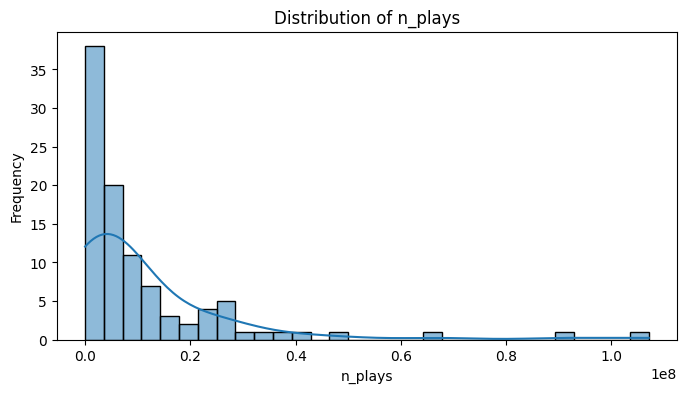

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for engagement metrics
metrics = ['n_likes', 'n_shares', 'n_comments', 'n_plays']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[metric], kde=True, bins=30)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.show()


###b. Correlation Heatmap


Check relationships between numerical features.



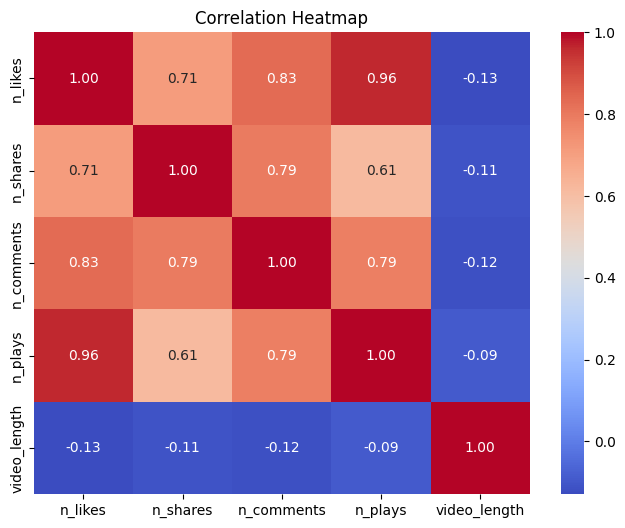

In [ ]:
# Compute correlation matrix
correlation = df[['n_likes', 'n_shares', 'n_comments', 'n_plays', 'video_length']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


###c. Engagement vs. Video Length

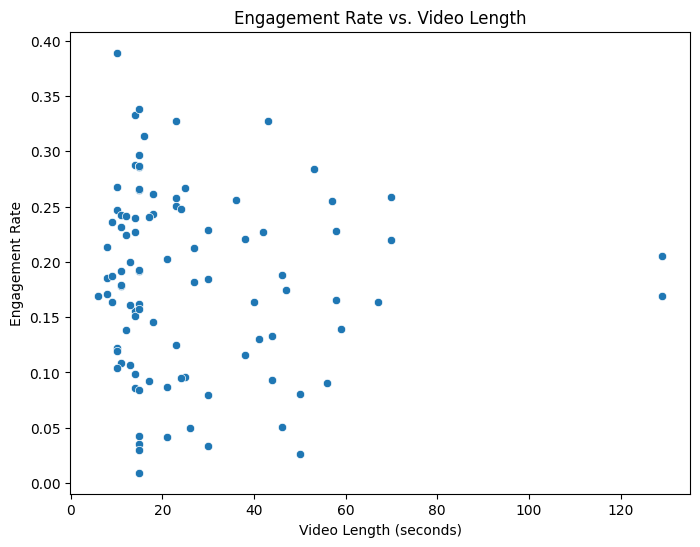

In [ ]:
# Scatter plot of engagement rate vs video length
df['engagement_rate'] = (df['n_likes'] + df['n_shares'] + df['n_comments']) / df['n_plays']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='video_length', y='engagement_rate')
plt.title("Engagement Rate vs. Video Length")
plt.xlabel("Video Length (seconds)")
plt.ylabel("Engagement Rate")
plt.show()


###d. Hashtag Analysis


Visualize the number of hashtags used in descriptions.



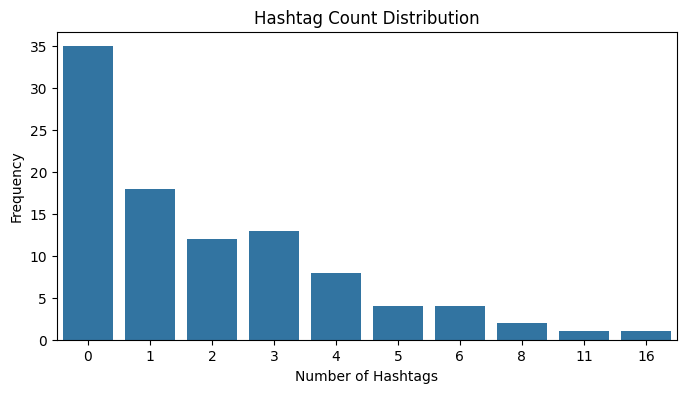

In [ ]:
# Count the number of hashtags in the video description
df['hashtag_count'] = df['video_desc'].str.count('#')
# Bar plot for hashtag count
plt.figure(figsize=(8, 4))
sns.countplot(x='hashtag_count', data=df)
plt.title("Hashtag Count Distribution")
plt.xlabel("Number of Hashtags")
plt.ylabel("Frequency")
plt.show()


#Data Modeling

##defining a problem:
The objective is to predict the success of TikTok videos by analyzing content features and early engagement metrics. Success can be defined in two ways: first, as a binary classification problem where videos exceeding a specific engagement rate threshold are labeled as successful, and second, by directly predicting engagement metrics such as likes, shares, and comments using regression models. This approach aims to uncover trends and factors that contribute to a video's virality on the platform.




##a. Create a Target Column

In [ ]:
# Define success threshold based on engagement rate
success_threshold = 0.1  # Adjust based on your data distribution
df['engagement_rate'] = (df['n_likes'] + df['n_shares'] + df['n_comments']) / df['n_plays']
df['is_success'] = (df['engagement_rate'] > success_threshold).astype(int)


##b. Feature Selection


Drop unnecessary columns, such as user_name, video_id, and video_link, which are unlikely to impact predictions.


In [ ]:
# Select relevant features
X = df[['video_length', 'hashtag_count', 'n_plays', 'n_comments', 'n_shares']]
y = df['is_success']


##c. Train-Test Split


Split the data into training and testing sets for validation.




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Apply Modeling Techniques

#a. Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Calculate metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)


#b. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Calculate metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)


#c. Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest.predict(X_test)

# Calculate metrics
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)


# Compare Models

In [ ]:
import pandas as pd

# Create a dictionary with the results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_tree, accuracy_forest],
    'Precision': [precision_log_reg, precision_tree, precision_forest],
    'Recall': [recall_log_reg, recall_tree, recall_forest],
    'F1-Score': [f1_log_reg, f1_tree, f1_forest]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression      0.75   0.875000  0.823529  0.848485
1        Decision Tree      0.90   0.941176  0.941176  0.941176
2        Random Forest      0.90   0.894737  1.000000  0.944444


#Fine-Tuning and Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 3, 'min_samples_split': 2}


#Conclusion

The Decision Tree and Random Forest models performed best with 90% accuracy. Random Forest achieved perfect recall (1.00) but slightly lower precision (0.89), while Decision Tree maintained a balance with precision and recall both at 0.94. Logistic Regression lagged with 75% accuracy. Random Forest is ideal for recall-focused tasks, while Decision Tree offers balanced predictions.






